In [4]:
%load_ext autoreload
%autoreload 2

# generic libraries
import matplotlib.pyplot as plt
import numpy as np

# project specific custom libraries
from config import *
from simulation import simulate_decay_times

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


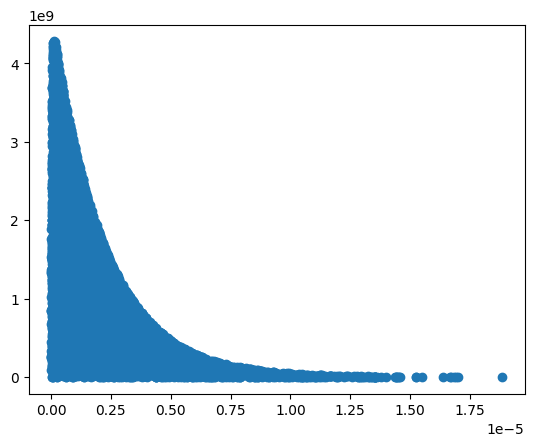

In [6]:
# generate 10'000 simulated decay times and produce a histogram of these
t_end = 2e-5

# generate some values from our fut
t_space = np.linspace(0, t_end, 100)

n = 10000
points = simulate_decay_times(n, t_end)
plt.scatter(points[:,0], points[:,1])